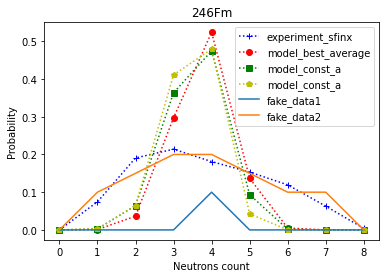

[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 0, 0, 0, 24, 0, 0, 0, 0]
KstestResult(statistic=0.4793388429752066, pvalue=3.9359933876048636e-05)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 0, 9, 72, 126, 33, 1, 0, 0]
KstestResult(statistic=0.2271184115771064, pvalue=5.298434435974109e-06)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 1, 15, 88, 114, 22, 0, 0, 0]
KstestResult(statistic=0.2471763085399449, pvalue=5.754377201405703e-07)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 1, 16, 99, 115, 10, 0, 0, 0]
KstestResult(statistic=0.29734919927300163, pvalue=5.274396475130061e-10)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 24, 36, 48, 48, 36, 24, 24, 0]
KstestResult(statistic=0.033884297520661154, pvalue=0.9979511546390353)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 18, 46, 52, 44, 37, 29, 15, 1]
KstestResult(statistic=0.0, pvalue=1.0)
[0, 18, 46, 52, 44, 37, 29, 15, 1]
[0, 8, 21, 23, 20, 17, 13, 7, 0]
KstestResult(statistic=0.004132231404958678, pvalue=1)
246Fm mean experiment_sfinx:  3.7785392191
246Fm dispersion expe

In [117]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

sf_total = 241
# Fm-246
experiment_sfinx = np.array([0,
                             0.0744933458,
                             0.1906650315,
                             0.2139786405,
                             0.18113788,
                             0.1532062738,
                             0.1194688463,
                             0.0630159348,
                             0.0040340473])
model_best_average = np.array([0, 
                               0.000981469247789, 
                               0.036295527115418, 
                               0.297116498126063, 
                               0.523862925878301, 
                               0.136787200106033, 
                               0.004955856204289, 
                               5.23e-07, 
                               0])
model_const_a = np.array([0, 
                          0.00275513650467692, 
                          0.0642697727768682, 
                          0.363509675971298, 
                          0.474408878006353, 
                          0.093345482522875,
                          0.00170846992062599,
                          2.58429730325327e-06,
                          0])
model_new_shell_corr = np.array([0,
                                 0.00256620189912815,
                                 0.0644684040640992,
                                 0.411013930899054,
                                 0.479079176708237,
                                 0.0427068424548669,
                                 0.000165443816015288,
                                 1.58599463483046e-10,
                                 0])
fake_data1 = np.array([0, 0, 0, 0, 0.1, 0, 0, 0, 0])
fake_data2 = np.array([0, 0.1, 0.15, 0.2, 0.2, 0.15, 0.1, 0.1, 0])

x = list(range(0, 9))
plt.plot(x,experiment_sfinx,'b+:',label='experiment_sfinx')
plt.plot(x,model_best_average,'ro:',label='model_best_average')
plt.plot(x,model_const_a,'gs:',label='model_const_a')
plt.plot(x,model_new_shell_corr,'yp:',label='model_const_a')
plt.plot(x,fake_data1,label='fake_data1')
plt.plot(x,fake_data2,label='fake_data2')
plt.legend()
plt.title('246Fm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()

def mean_from(probabilities, x_power=1):
    M_x = 0
    for x, p in enumerate(probabilities):
        M_x += pow(x, x_power) * p
    return M_x

def dispersion_from(probabilities):
    M_x = mean_from(probabilities, x_power=1)
    M_x2 = mean_from(probabilities, x_power=2)
    return M_x2 - pow(M_x, 2)

def neutron_events_from(probabilities, sf=sf_total):
    counts = list(map(lambda p: round(p*sf), probabilities))
    print(counts)
    r = np.empty(0)
    for k, count in enumerate(counts):
        r = np.append(r, np.full(count, k))
    return r.astype(int)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html
models = [fake_data1, model_best_average, model_const_a, model_new_shell_corr, fake_data2, experiment_sfinx]
for model in models:
    print(ks_2samp(neutron_events_from(experiment_sfinx), neutron_events_from(model)))
    
experiment_old_barrel = np.array([0.00517,
                                  0.0723,
                                  0.149,
                                  0.204,
                                  0.222,
                                  0.195,
                                  0.125,
                                  0.0269,
                                  0])
print(ks_2samp(neutron_events_from(experiment_sfinx), neutron_events_from(model, 108)))

print("246Fm mean experiment_sfinx: ", mean_from(experiment_sfinx))
print("246Fm dispersion experiment_sfinx: ", dispersion_from(experiment_sfinx))
print("246Fm mean experiment_old_barrel: ", mean_from(experiment_old_barrel))
print("246Fm dispersion experiment_old_barrel: ", dispersion_from(experiment_old_barrel))
# print("Sigma experimental: ", math.sqrt(dispersion_from(experiment_sfinx)))
print("246Fm mean model_best_average: ", mean_from(model_best_average))
print("246Fm dispersion model_best_average: ", dispersion_from(model_best_average))

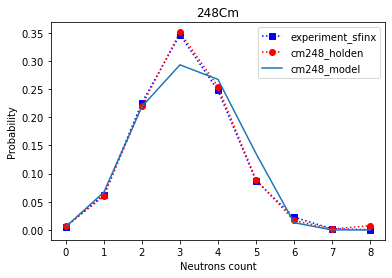

[1, 15, 54, 84, 60, 21, 5, 0, 0]
[1, 16, 53, 71, 64, 33, 3, 0, 0]
KstestResult(statistic=0.05660442600276625, pvalue=0.8027068115548733)
[2, 14, 53, 85, 61, 22, 4, 0, 2]
[1, 16, 53, 71, 64, 33, 3, 0, 0]
KstestResult(statistic=0.04868261530317777, pvalue=0.914458077767922)
mean cm248_sfinx:  3.132799104
dispersion cm248_sfinx:  1.348862605976798
mean cm248_dushin:  3.1298999999999992
dispersion cm248_dushin:  1.336425990000004
mean cm248_holden:  3.1891899999999995
dispersion cm248_holden:  1.391897143900005
mean cm248_model:  3.2077326645376
dispersion cm248_model:  1.419006509159308


In [16]:
# CM-248
cm248_sfinx = np.array([0.00526,
                        0.06268,
                        0.22584,
                        0.34653,
                        0.24749,
                        0.08716,
                        0.02263,
                        0.00193,
                        4.74888E-4])
cm248_dushin = np.array([0.0061,
                        0.0608,
                        0.2272,
                        0.3460,
                        0.2476,
                        0.0906,
                        0.0190,
                        0.0024,
                        0.0002,
                        0.0001])
cm248_holden = np.array([0.00674,
                         0.05965,
                         0.22055,
                         0.3509,
                         0.25438,
                         0.08935,
                         0.01674,
                         0.00169,
                         0.0074])
cm248_model = np.array([0.005531199,
                        0.066948724,
                        0.218853815,
                        0.292985388,
                        0.267202065,
                        0.135572816,
                        0.012894201,
                        1.18E-5,
                        6.72E-11])
plt.plot(x,cm248_sfinx,'bs:',label='experiment_sfinx')
plt.plot(x,cm248_holden,'ro:',label='cm248_holden')
plt.plot(x,cm248_model,label='cm248_model')
plt.legend()
plt.title('248Cm')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()
print(ks_2samp(neutron_events_from(cm248_sfinx), neutron_events_from(cm248_model)))
print(ks_2samp(neutron_events_from(cm248_holden), neutron_events_from(cm248_model)))

print("mean cm248_sfinx: ", mean_from(cm248_sfinx))
print("dispersion cm248_sfinx: ", dispersion_from(cm248_sfinx))
print("mean cm248_dushin: ", mean_from(cm248_dushin))
print("dispersion cm248_dushin: ", dispersion_from(cm248_dushin))
print("mean cm248_holden: ", mean_from(cm248_holden))
print("dispersion cm248_holden: ", dispersion_from(cm248_holden))
print("mean cm248_model: ", mean_from(cm248_model))
print("dispersion cm248_model: ", dispersion_from(cm248_model))

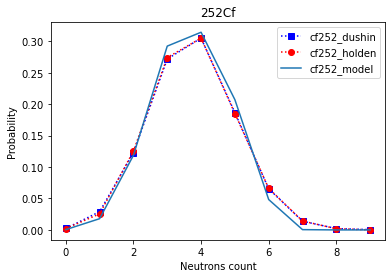

[1, 7, 30, 66, 74, 45, 16, 3, 1, 0]
[0, 4, 29, 70, 76, 50, 12, 0, 0, 0]
KstestResult(statistic=0.03251199562863924, pvalue=0.9987550070796631)
[1, 6, 30, 66, 74, 45, 16, 3, 0, 0]
[0, 4, 29, 70, 76, 50, 12, 0, 0, 0]
KstestResult(statistic=0.029045643153526972, pvalue=0.9999619383335708)
mean cf252_holden:  3.75702
dispersion cf252_holden:  1.5897207196000025
mean cf252_dushin:  3.7560000000000002
dispersion cf252_dushin:  1.621663999999999
mean cf252_model:  3.7198253400000003
dispersion cf252_model:  1.2615190278938808


In [17]:
# CF-252
cf252_dushin = np.array([0.0023,
                         0.029,
                         0.123,
                         0.2719,
                         0.3052,
                         0.1867,
                         0.0654,
                         0.0139,
                         0.0021,
                         5E-4])
cf252_holden = np.array([0.00217,
                         0.02556,
                         0.12541,
                         0.27433,
                         0.30517,
                         0.18523,
                         0.06607,
                         0.01414,
                         0.00186,
                         6E-5])
cf252_model = np.array([4.71678E-4,
                        0.01787,
                        0.1187,
                        0.29246,
                        0.31453,
                        0.20722,
                        0.04831,
                        4.41876E-4,
                        2.76E-7,
                        0])
xx = list(range(0, 10))
plt.plot(xx,cf252_dushin,'bs:',label='cf252_dushin')
plt.plot(xx,cf252_holden,'ro:',label='cf252_holden')
plt.plot(xx,cf252_model,label='cf252_model')
plt.legend()
plt.title('252Cf')
plt.xlabel('Neutrons count')
plt.ylabel('Probability')
plt.show()
print(ks_2samp(neutron_events_from(cf252_dushin), neutron_events_from(cf252_model)))
print(ks_2samp(neutron_events_from(cf252_holden), neutron_events_from(cf252_model)))

print("mean cf252_holden: ", mean_from(cf252_holden))
print("dispersion cf252_holden: ", dispersion_from(cf252_holden))
print("mean cf252_dushin: ", mean_from(cf252_dushin))
print("dispersion cf252_dushin: ", dispersion_from(cf252_dushin))
print("mean cf252_model: ", mean_from(cf252_model))
print("dispersion cf252_model: ", dispersion_from(cf252_model))